## TP3 : Logistic regression

The purpose of this tutorial is to implement and use the Logistic Regression for binary classification. We will apply this
method to the problem of handwritten characters to learn how to
distinguish two numbers (here 5 and 6).


In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as la

## 1. Logistic regression, IRLS algorithm.

### Preliminary question: the algorithm

#### Have a look at the function `regression_logistique.m` and locate the main steps of the algorithm you have been taught (see course).
You can comment the code in the cell below.

In [2]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3):
    '''Entrees :
    X = [ones(N_train,1) x_train];
    t = class_train 
    Nitermax = nombre maximale d'itérations (20 par défaut)
    eps_conv = critère de convergence sur norm(w-w_old)/norm(w) ; 
    eps_conv=1e-3 par défaut
    
    Sorties : 
    w : vecteur des coefficients de régression logistique
    Niter : nombre d'itérations utilisées effectivement

    Fonction de régression logistique pour la classification binaire.

    Utilisation :
       Nitermax = 50
       eps_conv = 1e-4
       [w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)
    '''
    N_train = X.shape[0] # size of training set 

    # initialisation
    w = np.zeros((X.shape[1],)) # we start by some chosen w
    w_old = w 
    y = 1/2*np.ones((N_train,)) # we start by the middle y (0.5 everywhere)
    R = np.diag(y*(1-y))   # diag(y_n(1-y_n))
    z = X.dot(w_old)-la.inv(R).dot(y-t)
    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)

    # loop of the Newton-Raphson algortihm
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) and (Niter<Nitermax) ): # we stop when the max number of iterations has been reached, or when w and w_old are close enough (convergence)
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w))) # sigma function
        R = np.diag(y*(1-y))  
        w_old = w 
        z = X.dot(w_old)-la.inv(R).dot(y-t) 
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
         
    return w, Niter

### Reading & preparing synthetic data

Load the training and test data sets `synth_train.txt`
and `synth_test.txt`. The targets t belong to {1,2} and the features  
x belong to R^2. 

We have 100 training samples and 200 test samples

* the 1st column contains the label of each sample, 
* columns 2 and 3 contain the coordinate of each point.

In [3]:
# Training set
synth_train = np.loadtxt('synth_train.txt') 
class_train = synth_train[:,0]
class_train_1 = np.where(synth_train[:,0]==1)[0]
class_train_2 = np.where(synth_train[:,0]==2)[0]
x_train = synth_train[:,1:]
x1_train = x_train[:,0]
x2_train = x_train[:,1]
N_train = np.size(x_train,axis=0)

# Test set
synth_test = np.loadtxt('synth_test.txt')
class_test = synth_test[:,0]
class_test_1 = np.where(synth_test[:,0]==1)[0]
class_test_2 = np.where(synth_test[:,0]==2)[0]
x_test = synth_test[:,1:]
x1_test = x_test[:,0]
x2_test = x_test[:,1]
N_test = np.size(x_test,axis=0)

Text(0.5, 1.0, 'Training set')

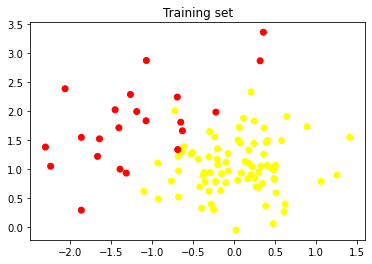

In [4]:
# We plot to visualize the data
plt.scatter(x1_train, x2_train, c = class_train, cmap='autumn')
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

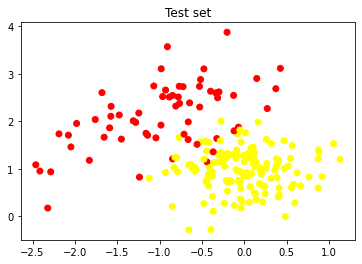

In [5]:
plt.scatter(x1_test, x2_test, c = class_test, cmap='autumn')
plt.title('Test set')

### Preparing features for logistic regression (binary classification)
First, we prepare the feature matrix and the target vector associated to 
the training and test sets:


In [6]:
X = np.hstack((np.ones((N_train,1)),x_train))
t = 2-class_train   # 0 if class=2, 1 if class=1

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test   # 0 if class=2, 1 if class=1

### Exercise 1 : the logistic function of decision

1. Use the function `regression_logistique.m` to estimate the logistic
regression vector `w`. *Indication : use `Nitermax = 50;
eps_conv=1e-3;`.*
2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set
to get the classification results. Recall that $y_n=\sigma(w^T x)$ (logistic function)
and that *using vectors* you may directly write $y=\sigma(Xw)$, with the
column of ones in X.
3. Display the results by plotting the points from both the training set
and the test set.
4. Write the equation which defines the decision boundary.
5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment. 


In [7]:
# Q1
w, Niter = regression_logistique(X, t, Nitermax = 50, eps_conv = 1e-3) # We use the function defined above

In [8]:
# Q2
y = 1/(1+np.exp(-X.dot(w))) # logistic function
f = np.round(y,0) # the round function sets the value to the closest integer between 0 and 1 (separation at 0.5)

You can draw the decision boundary $w^Tx = 0$ by using: 

Text(0.5, 1.0, 'Training set')

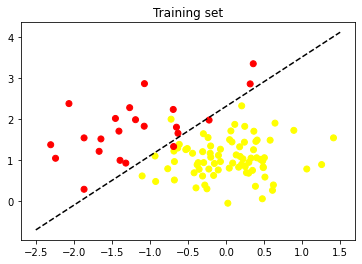

In [9]:
# Q3
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]
plt.plot(x1,x2,'k--') # decision boudary
plt.scatter(x1_train, x2_train, c = class_train, cmap='autumn')
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

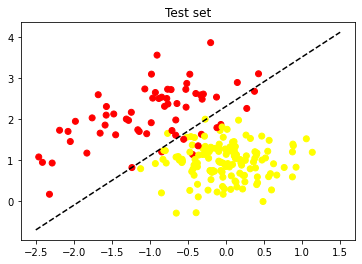

In [10]:
plt.plot(x1,x2,'k--')
plt.scatter(x1_test, x2_test, c = class_test, cmap='autumn')
plt.title('Test set')

In [11]:
# Q4
print("The equation of the boundary is : x2 = "+str(-w[0]/w[2]) + " + " + str(-w[1]/w[2]) + "*x1")

The equation of the boundary is : x2 = 2.3172293429907724 + 1.206666166839624*x1


In [12]:
# Q5
n = 10 # numbers of points to add
xx = [list(np.array([-3,4]))+np.array([np.cos(np.random.random()), np.sin(np.random.random())]) for i in range (n)] # generated a cluster with coordinates around [-3,4]
yy = [1 for i in range (n)] # label the cluster as 1
x_train_bis = np.array(list(x_train)+xx) # add the new points
class_train_bis = np.array(list(class_train)+yy) # add the new labels

x1_train_bis = x_train_bis[:,0] # recompute the variables
x2_train_bis = x_train_bis[:,1] # recompute the variables

Text(0.5, 1.0, 'Training set')

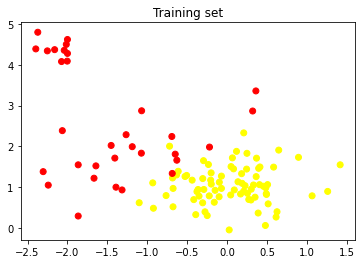

In [13]:
# We replot with the new points
plt.scatter(x1_train_bis, x2_train_bis, c = class_train_bis, cmap='autumn')
plt.title('Training set')

In [14]:
# We recompute all the variables

X = np.hstack((np.ones((N_train+n,1)),x_train_bis))
t = 2-class_train_bis

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test

w, Niter = regression_logistique(X, t, Nitermax = 50, eps_conv = 1e-3)

y = 1/(1+np.exp(-X.dot(w))) # logistic function
f = np.round(y,0)

x1_bis = np.linspace(-2.5,1.5,10) 
x2_bis = (-w[0]-w[1]*x1)/w[2]

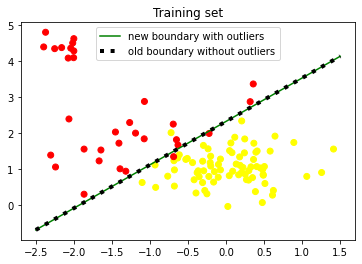

In [15]:
# We plot the old and new decision boundaries
plt.plot(x1_bis,x2_bis,'green', label = "new boundary with outliers")
plt.plot(x1,x2,'k:',linewidth=4, label = "old boundary without outliers")
plt.scatter(x1_train_bis, x2_train_bis, c = class_train_bis, cmap='autumn')
plt.title('Training set')
plt.legend()

We can see that the boundary did not move, which means that the logistic regression (LR) is robust to outliers.

Now we compare LR with LDA as we did in the previous lab :

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import pandas as pd

# We compute the decision boundary on a grid
xmin = np.min([np.min(x1_train_bis),np.min(x1_test)])
xmax = np.max([np.max(x1_train_bis),np.max(x1_test)])
ymin = np.min([np.min(x2_train_bis),np.min(x2_test)])
ymax = np.max([np.max(x2_train_bis),np.max(x2_test)])
N = 50
x = np.linspace(xmin,xmax,N)
y = np.linspace(ymin,ymax,N)
x1_grid,x2_grid = np.meshgrid(x,y)
data = [[concatenate(x1_grid)[i],concatenate(x2_grid)[i]] for i in range(len(concatenate(x1_grid)))]
grid = pd.DataFrame(data = data, columns=["x1","x2"]).transpose()

In [17]:
clf = lda()
clf.fit(x_train, class_train) # LDA without the outliers
Y_hat_train = clf.predict(data)

In [18]:
clf = lda()
clf.fit(x_train_bis, class_train_bis) # LDA with the outliers
Y_hat_train_bis = clf.predict(data)

We first compare LDA and LR without outliers :

Text(0.5, 1.0, 'Training set')

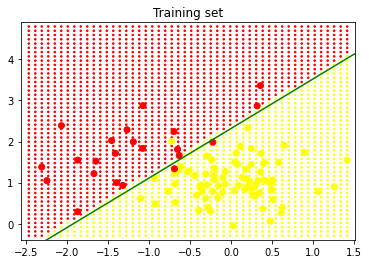

In [19]:
plt.scatter(x1_grid, x2_grid, c=Y_hat_train, cmap='autumn', s = 10, marker = '.')
plt.scatter(x1_train, x2_train, c = class_train, cmap='autumn')
plt.plot(x1_bis,x2_bis,'green')
e = 10**(-1)
plt.xlim(xmin-e,xmax+e)
plt.ylim(ymin-e,ymax+e)
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

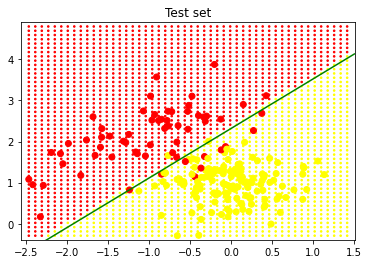

In [20]:
plt.scatter(x1_grid, x2_grid, c=Y_hat_train, cmap='autumn', s = 10, marker = '.')
plt.scatter(x1_test, x2_test, c = class_test, cmap='autumn')
plt.plot(x1_bis,x2_bis,'green')
e = 10**(-1)
plt.xlim(xmin-e,xmax+e)
plt.ylim(ymin-e,ymax+e)
plt.title('Test set')

We approximately have the same decision boundary.

We then compare LDA and LR with outliers :

Text(0.5, 1.0, 'Training set')

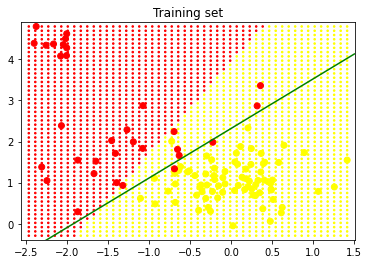

In [21]:
# We overlay the LDA decision boundary (on the grid) and the logistic regression boundary (line)
plt.scatter(x1_grid, x2_grid, c=Y_hat_train_bis, cmap='autumn', s = 10, marker = '.')
plt.scatter(x1_train_bis, x2_train_bis, c = class_train_bis, cmap='autumn')
plt.plot(x1_bis,x2_bis,'green')
e = 10**(-1)
plt.xlim(xmin-e,xmax+e)
plt.ylim(ymin-e,ymax+e)
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

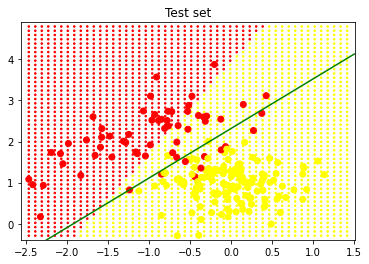

In [22]:
plt.scatter(x1_grid, x2_grid, c=Y_hat_train_bis, cmap='autumn', s = 10, marker = '.')
plt.scatter(x1_test, x2_test, c = class_test, cmap='autumn')
plt.plot(x1_bis,x2_bis,'green')
e = 10**(-1)
plt.xlim(xmin-e,xmax+e)
plt.ylim(ymin-e,ymax+e)
plt.title('Test set')

We can see that the LDA decision boundary (grid) and the logistic regression boundary (line) do not match. The LDA has been shifted to the left due to the outliers, which means that LDA is much more susceptible to outliers than LR.

## 2. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images 
of handwritten digits which are 5 and 6 here. Each line of the matrix
contains 256 pixel values coding for the gray level of a 16x16 image.

In [23]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

### Examples of images


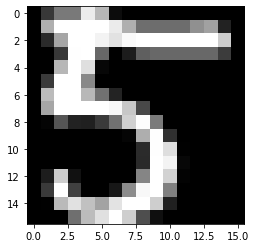

In [24]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

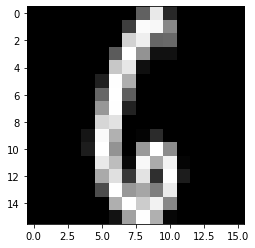

In [25]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:


In [26]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train
class_test = np.ones((len(train_5[145:,:])+len(train_6[200:,:]),1))   # label 1 for digit 6
class_test[:len(train_5[145:,:])] = 0       # label 0 for digit 5

## Exercise 2: logistic regression to classify 5 & 6

1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.
2. Identify the indices of the most significant pixels, which are defined 
as having a standard deviation greater than 0.5 here. We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.
3. Show a binary image to locate these pixels.
_Indication : `Isig = zeros(16); Isig(list_sig)=1; Isig=Isig';`._
4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.
5. Do the same with `x_test_brut` to extract `x_test`.
6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`
7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_
8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.
9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.


In [27]:
#Q1
print(np.min(I)) # We print the extremal values
print(np.max(I))

-1.0
1.0


In [28]:
#Q2
sigma_col = np.std(x_train_brut, axis=0) # We compute the std on every image for the pixels that are in the same position
list_sig = []
for k in range(len(sigma_col)): # We keep only the most significant ones, std > 0.5
    if sigma_col[k] > 0.5:
        list_sig.append(k)
print(len(list_sig))

173


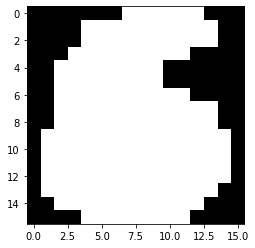

In [29]:
#Q3
Isig = zeros(256)
Isig[list_sig]=1 # We put ones in significant pixels
Isig_bis = Isig.reshape(16,16) # We reshape so we can plot the image
plt.imshow(Isig_bis, cmap = "gray") # White pixels are significant and will be kept for the computation

In [30]:
#Q4
x_train = np.transpose(np.transpose(x_train_brut)[list_sig]) # We remove unsignificant pixels on the training set
# print(x_train.shape)

In [31]:
#Q5
x_test = np.transpose(np.transpose(x_test_brut)[list_sig])  # We remove unsignificant pixels on the test set
# print(x_test.shape)

In [32]:
#Q6
X = np.hstack((np.ones((N_train,1)),x_train)) # We define some useful notations
t = class_train.reshape(N_train,)
N_train = np.size(x_train,axis=0)

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = class_test.reshape(N_test,)
N_test = np.size(x_test,axis=0)

w, Niter = regression_logistique(X,t, Nitermax = 13, eps_conv = 1e-3) # We use the function defined above

In [33]:
y = 1/(1+np.exp(-X.dot(w))) # logistic function
f_train = np.round(y,0) # the round function sets the value to the closest integer between 0 and 1 (separation at 0.5)
# print(f_train)

In [34]:
error = sum(abs(f_train-t))/N_train
print(error)

0.0


We have no error on the training set !

In [35]:
#Q7
X = np.hstack((np.ones((N_test,1)),x_test))
y = 1/(1+np.exp(-X.dot(w))) # logistic function
f_test = np.round(y,0) # the round function sets the value to the closest integer between 0 and 1 (separation at 0.5)
# print(f_test)

In [36]:
#Q8
error = sum(abs(f_test-t_test))/N_test
print(error)

0.07885714285714286


We have around 8% of mislabelling, which is quite good.

In [37]:
#Q9
error_index = [] # We retrive the indices of the images where the prediction was wrong
A = abs(f_test-t_test)
for i in range(len(A)):
    if A[i] > 0:
        error_index.append(i)
# print(error_index)

In [38]:
# for n in error_index : # All the mislabelled images
#     print(n)
#     I = reshape(x_test_brut[n,:],(16,16))
#     plt.imshow(I,cmap='gray')
#     plt.show()

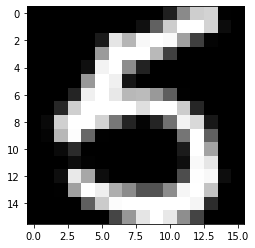

In [39]:
I = reshape(x_test_brut[127,:],(16,16))
plt.imshow(I,cmap='gray')
plt.show()

This 5 was labelled 6, which is understandable because the upper part of the 5 is rounded like in a 6, and the bottom almost joins itself like the loop in a 6.

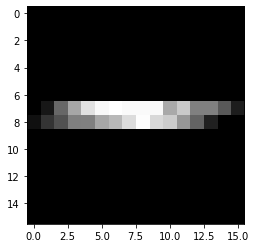

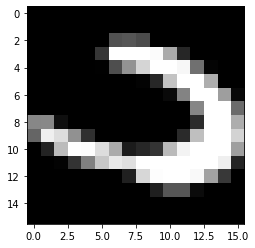

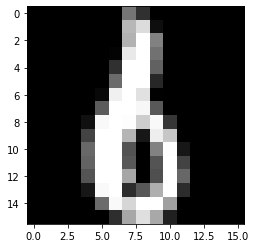

In [40]:
for n in [367,401,833] : # Some nice examples of mislabelled images
    I = reshape(x_test_brut[n,:],(16,16))
    plt.imshow(I,cmap='gray')
    plt.show()

These numbers don't even look like numbers, so it is normal that the algorithm didn't recognize them.

Also, we have a training error of 0, so maybe we are overfitting on the training set.

## 3. Logistic regression using `scikit-learn`

1. **Go to** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for a presentation of the logistic regression model in `scikit-learn`.

2. **Apply** it to the present data set.

3. **Comment** on the use of logistic regression.

*Indication : you may have a look at* 

a) Theory : http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

b) Video :  https://www.coursera.org/learn/machine-learning/lecture/4BHEy/regularized-logistic-regression 

c) Example : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

*for a short presentation of regularized logistic regression.*

In [55]:
def warn(*args, **kwargs): # We ignore the stop warnings of sklearn
    pass
import warnings
warnings.warn = warn

In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=13,tol=1e-3).fit(x_train, t)
y_hat_train = clf.predict(x_train)
error = sum(abs(y_hat_train-t))/N_train
print(error)

0.0


In [54]:
y_hat_test = clf.predict(x_test)
error = sum(abs(y_hat_test-t_test))/N_test
print(error)

0.027428571428571427


As for the regression_lineaire function, the LogisticRegression from sklearn achieve an error rate of 0 on the training set.
But on the test set, the LogisticRegression get an error rate of 3%, versus 8% for the regression_lineaire function.

An explanation for this difference of error rates could be that the sklearn function use a regularized log regression.